## Global CO2 Emissions from Fossil Fuels Data Analysis and Forecasting 

In [305]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [306]:
data = pd.read_csv(r"C:\Users\Krupa\Documents\Krups Coding\Kaggle\DA_CO2emissions\co2emissions.csv")
data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is organized using the following columns: 
- Country (the name of the country)
- ISO 3166-1 alpha-3 (the three letter code for the country)
- Year (the year of survey data)
- Total (the total amount of CO2 emitted by the country in that year)
- Coal (amount of CO2 emitted by coal in that year)
- Oil (amount emitted by oil) 
- Gas (amount emitted by gas) 
- Cement (amount emitted by cement)
- Flaring (flaring emission levels ) 
- Other (other forms such as industrial processes )
- Per Capita which provides an insight into how much personal carbon dioxide emission is present in each Country per individual 


### Objectives:- 

-  how have the emissions changed over time for coal, oil, gas, cement, flaring, other 
- who are the top contributors to emissions for coal, oil, gas, cement, flaring,other (overall)
- are there any correlations?
- plot total avg. emissions by top 10 countries 
- global plots chloropleth? 
- what can we forecast for the next 5-10 years? 

### Data Cleaning

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [308]:
data.shape

(63104, 11)

In [309]:
data.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


In [310]:
def check_data(df):
    summary = [
        [col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns] 
    
    df_check = pd.DataFrame(summary, columns = ['column', 'dtype', 'instances', 'unique', 'missing_vals', 'duplicates'])
    
    return df_check 

In [311]:
check_data(data)

,column,dtype,instances,unique,missing_vals,duplicates
0,Country,object,63104,232,0,0
1,ISO 3166-1 alpha-3,object,61472,225,1632,0
2,Year,int64,63104,272,0,0
3,Total,float64,62904,16193,200,0
4,Coal,float64,21744,10833,41360,0
5,Oil,float64,21717,11734,41387,0
6,Gas,float64,21618,6443,41486,0
7,Cement,float64,20814,9119,42290,0
8,Flaring,float64,21550,3578,41554,0
9,Other,float64,1620,1519,61484,0


In [312]:
# change date col from int to datetime
def convert_to_datetime(df, column_name):
    try: 
        df[column_name] = pd.to_datetime(df[column_name], format = "%Y")
        return df
    except Exception as e:
        print(f"Error: {e}")
        return None 

In [313]:
convert_to_datetime(data, 'Year')

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750-01-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751-01-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752-01-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753-01-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754-01-01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017-01-01,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018-01-01,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019-01-01,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020-01-01,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [314]:
print('Missing values (%) per field:\n', 100*data.isnull().mean())

Missing values (%) per field:
 Country                0.000000
ISO 3166-1 alpha-3     2.586207
Year                   0.000000
Total                  0.316937
Coal                  65.542596
Oil                   65.585383
Gas                   65.742267
Cement                67.016354
Flaring               65.850025
Other                 97.432809
Per Capita            69.932175
dtype: float64


A large percentage of values are missing from this dataset, for now let's assume these values are zero. 

In [315]:
data.fillna(0, inplace=True)

In [316]:
data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [317]:
print('Missing values (%) per field:\n', 100*data.isnull().mean())

Missing values (%) per field:
 Country               0.0
ISO 3166-1 alpha-3    0.0
Year                  0.0
Total                 0.0
Coal                  0.0
Oil                   0.0
Gas                   0.0
Cement                0.0
Flaring               0.0
Other                 0.0
Per Capita            0.0
dtype: float64


In [318]:
#let's take a closer look at the ISO column 
data.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [319]:
data['ISO 3166-1 alpha-3'].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CAN', 'CPV',
       'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'COL', 'COM', 'COG', 'COK',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'PRK', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'ETH', 'FRO', 'FSM', 'FJI', 'FIN', 'PCZ', 'FRA', 0, 'GUF',
       'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GLP', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRQ', 'IRL', 'IRN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KSV', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC',
       'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ',
       'MRT', 'MU

In [320]:
data['ISO 3166-1 alpha-3'].nunique()

226

In [321]:
data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [322]:
data['Country'].nunique()

232

The ratio of countries to ISO is unbalanced. There are 6 more countries than ISO's. This suggests perhaps some ISO's may be used multiple times, which makes sense as some islands etc. form part of countries.

In [323]:
data.loc[data['Country'] == 'International Transport']

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62560,International Transport,XIT,1750-01-01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62561,International Transport,XIT,1751-01-01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62562,International Transport,XIT,1752-01-01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62563,International Transport,XIT,1753-01-01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62564,International Transport,XIT,1754-01-01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
62827,International Transport,XIT,2017-01-01,1230.506945,0.0,1230.506945,0.0,0.0,0.0,0.0,0.0
62828,International Transport,XIT,2018-01-01,1270.690768,0.0,1270.690768,0.0,0.0,0.0,0.0,0.0
62829,International Transport,XIT,2019-01-01,1249.558280,0.0,1249.558280,0.0,0.0,0.0,0.0,0.0
62830,International Transport,XIT,2020-01-01,938.508679,0.0,938.508679,0.0,0.0,0.0,0.0,0.0


In [324]:
data.loc[data['Country'] == 'Global']

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62832,Global,WLD,1750-01-01,9.350528,9.350528,0.000000,0.000000,0.000000,0.000000,0.000000,0.011492
62833,Global,WLD,1751-01-01,9.350528,9.350528,0.000000,0.000000,0.000000,0.000000,0.000000,0.011438
62834,Global,WLD,1752-01-01,9.354192,9.354192,0.000000,0.000000,0.000000,0.000000,0.000000,0.011390
62835,Global,WLD,1753-01-01,9.354192,9.354192,0.000000,0.000000,0.000000,0.000000,0.000000,0.011339
62836,Global,WLD,1754-01-01,9.357856,9.357856,0.000000,0.000000,0.000000,0.000000,0.000000,0.011294
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017-01-01,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018-01-01,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019-01-01,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020-01-01,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


It's unclear what global and internatioal transport refer to. For now, let's remove these rows from our analysis, and consider them separately.

In [325]:
world_data = data[(data['Country']=='Global') | (data['Country']=='International Transport')]
world_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62560,International Transport,XIT,1750-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62561,International Transport,XIT,1751-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62562,International Transport,XIT,1752-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62563,International Transport,XIT,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62564,International Transport,XIT,1754-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [326]:
world_data.shape

(544, 11)

### Average CO2 emissions

In [327]:
full_countries_data = data[(data['Country']!='Global') & (data['Country']!='International Transport')]
full_countries_data.shape

(62560, 11)

In [328]:
full_countries_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
full_countries_data['Country'].nunique()

230

In [330]:
full_countries_df = full_countries_data.copy()
full_countries_df.set_index('Year', inplace=True)
annual_avg_full_data = full_countries_df[['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].resample('Y').mean().round(2)

Text(0.5, 1.0, 'Annual Average Emissions')

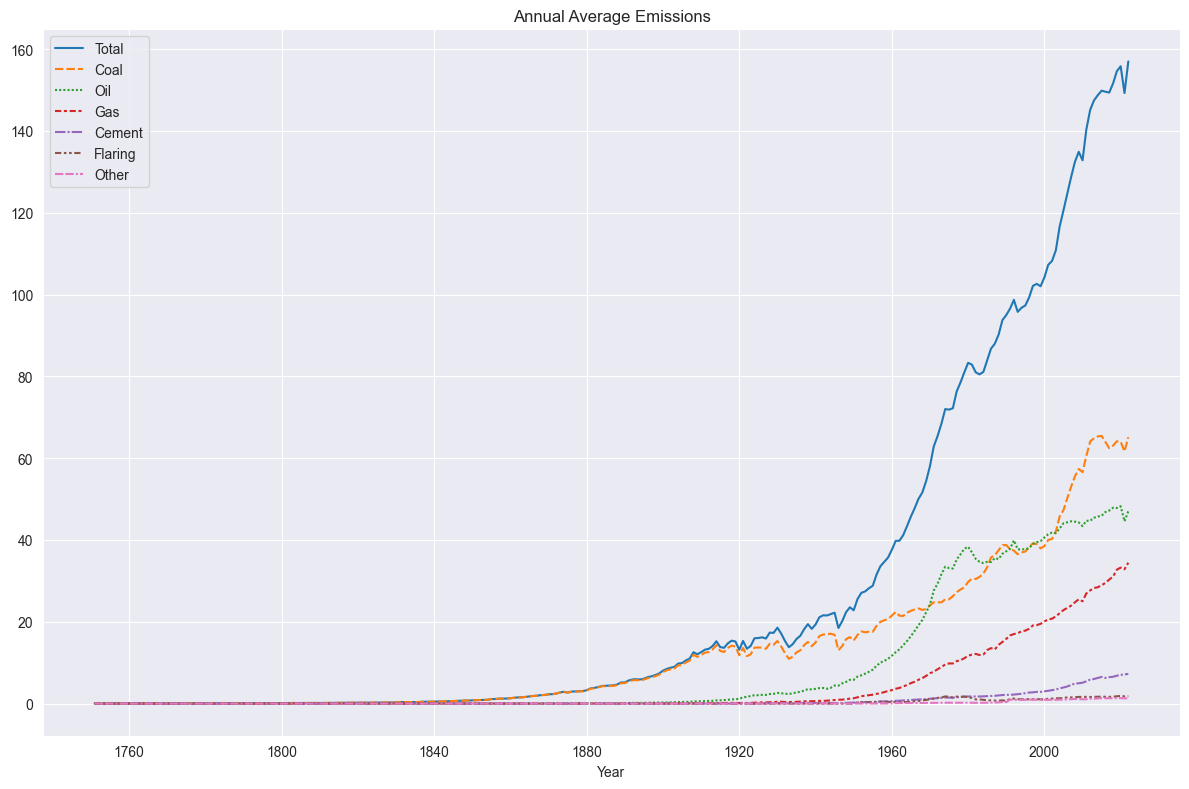

In [331]:
plt.figure(figsize=(12,8))
sns.lineplot(data=annual_avg_full_data)
plt.title(label='Annual Average Emissions')

In [332]:
df_1920 = full_countries_data[full_countries_data['Year']>='1920-01-01']
df_1920

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
170,Afghanistan,AFG,1920-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
171,Afghanistan,AFG,1921-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
172,Afghanistan,AFG,1922-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
173,Afghanistan,AFG,1923-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
174,Afghanistan,AFG,1924-01-01,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
62555,Zimbabwe,ZWE,2017-01-01,9.596071,5.900452,3.226752,0.0,0.468867,0.0,0.0,0.650533
62556,Zimbabwe,ZWE,2018-01-01,11.795478,7.177776,4.059712,0.0,0.557990,0.0,0.0,0.783639
62557,Zimbabwe,ZWE,2019-01-01,11.114607,6.888320,3.656672,0.0,0.569615,0.0,0.0,0.723861
62558,Zimbabwe,ZWE,2020-01-01,10.607897,6.721571,3.316712,0.0,0.569615,0.0,0.0,0.676970


<Axes: title={'center': 'Per Capita Emissions Trend, 1920 - 2021'}, xlabel='Year', ylabel='Per Capita'>

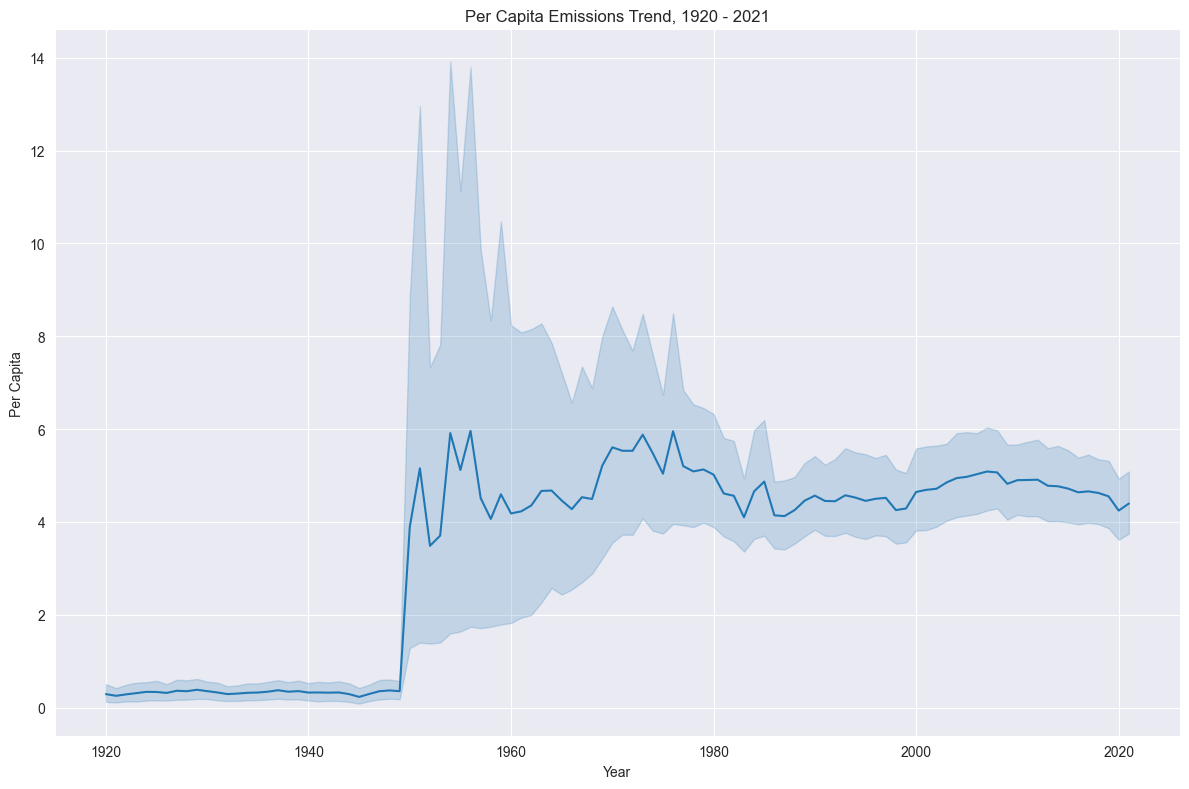

In [333]:
plt.figure(figsize=(12,8))
plt.title(label='Per Capita Emissions Trend, 1920 - 2021')
sns.lineplot(data=full_countries_data[full_countries_data['Year']>='1920-01-01'], x='Year', y='Per Capita')

<Axes: title={'center': 'Total Emissions Trend, 1920 - 2021'}, xlabel='Year', ylabel='Total'>

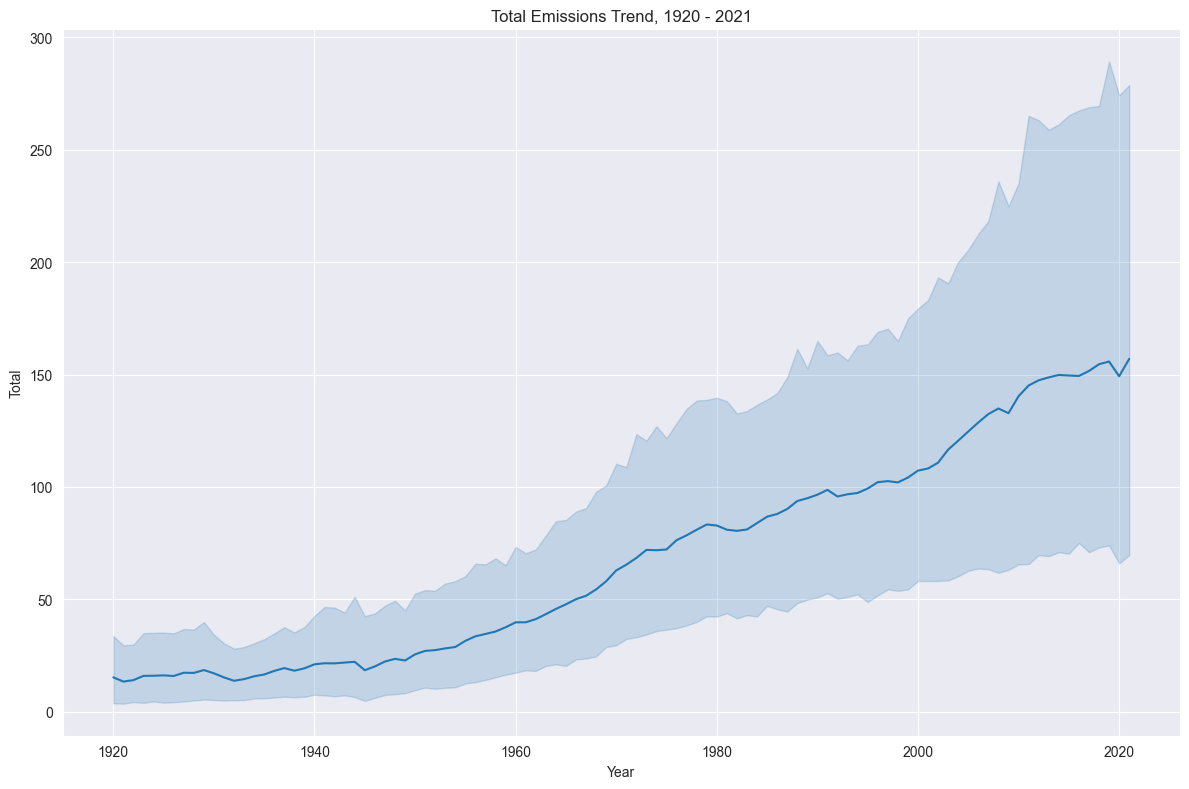

In [334]:
plt.figure(figsize=(12,8))
plt.title(label='Total Emissions Trend, 1920 - 2021')
sns.lineplot(data=full_countries_data[full_countries_data['Year']>='1920-01-01'], x='Year', y='Total')

Coal, oil and gas are the highest producing CO2 emissions. Let's take a look at the top emitting countries in these categories. 

In [335]:
df_1920.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
170,Afghanistan,AFG,1920-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,Afghanistan,AFG,1921-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,Afghanistan,AFG,1922-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,Afghanistan,AFG,1923-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174,Afghanistan,AFG,1924-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [336]:
countries_df = df_1920.groupby('Country')[['Coal', 'Oil', 'Gas', 'Total']].mean()
countries_df

,Coal,Oil,Gas,Total
Country,,,,
Afghanistan,0.565456,1.289973,0.198692,2.137187
Albania,0.654723,1.821945,0.163797,2.880774
Algeria,1.152038,16.212626,21.121073,47.671757
Andorra,0.000000,0.151809,0.000000,0.151809
Angola,0.015694,3.400259,0.452079,6.442309
...,...,...,...,...
Viet Nam,21.968810,13.808806,3.042654,45.075572
Wallis and Futuna Islands,0.000000,0.007579,0.000000,0.007579
Yemen,0.048797,5.834148,0.133678,6.388203


In [337]:
total_df = countries_df.sort_values('Total', ascending=False)
total_df.head(10)

,Coal,Oil,Gas,Total
Country,,,,
USA,1415.548412,1560.752764,763.976682,3805.065881
China,1830.672270,338.152385,70.215798,2441.254679
Russia,436.345846,321.412107,343.668769,1137.722073
Germany,491.471057,193.719744,70.365272,771.190280
Japan,227.203584,324.733192,69.231892,643.915756
India,357.628455,144.440256,24.342127,553.922077
United Kingdom,308.307883,131.413471,70.423844,519.255594
France,126.169074,150.304292,35.913480,322.315822
Canada,82.761602,147.004037,81.065136,321.526322


Text(0.5, 1.0, 'Top 10 Countries contributing to CO2 emissions, 1920 - 2021')

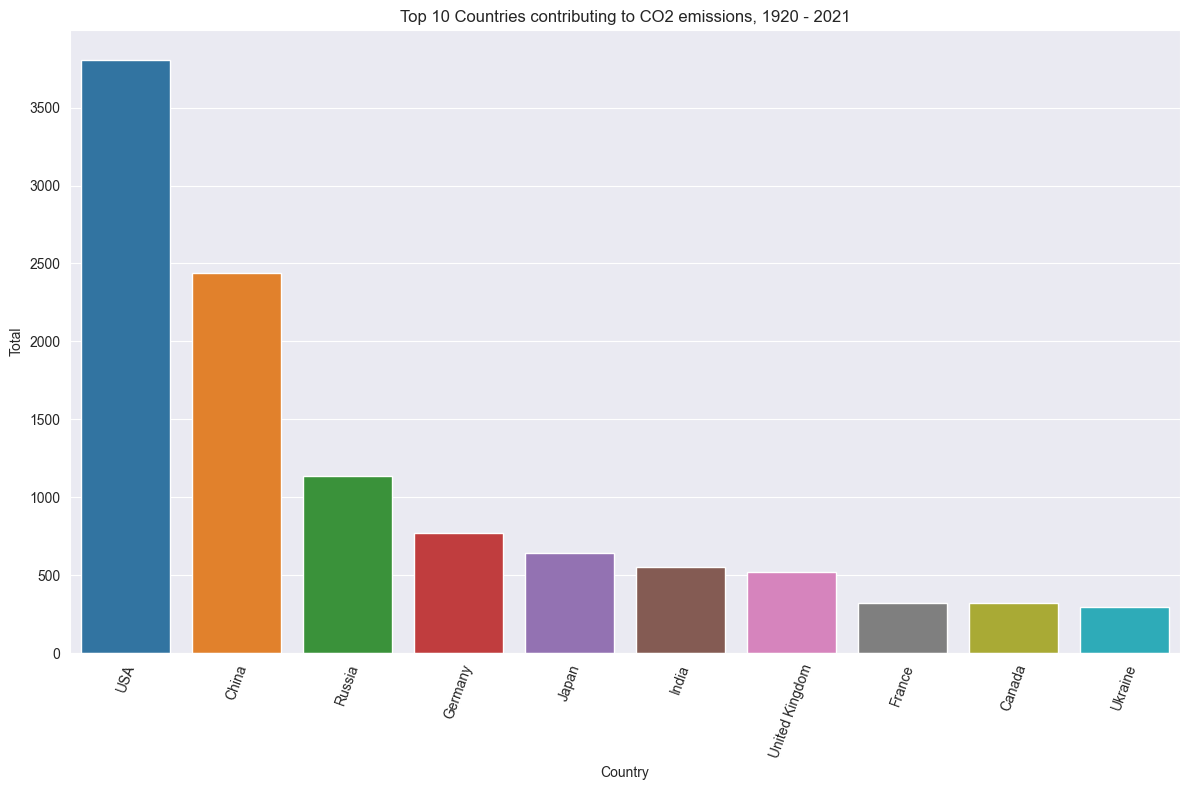

In [338]:
plt.figure(figsize=(12,8))
sns.barplot(total_df.head(10), x ='Country', y='Total', hue='Country')
plt.xticks(rotation=70)
plt.tight_layout()
plt.title(label='Top 10 Countries contributing to CO2 emissions, 1920 - 2021')

In [339]:
coal_df = countries_df.sort_values('Coal', ascending=False)
coal_df.head(10)

,Coal,Oil,Gas,Total
Country,,,,
China,1830.672270,338.152385,70.215798,2441.254679
USA,1415.548412,1560.752764,763.976682,3805.065881
Germany,491.471057,193.719744,70.365272,771.190280
Russia,436.345846,321.412107,343.668769,1137.722073
India,357.628455,144.440256,24.342127,553.922077
United Kingdom,308.307883,131.413471,70.423844,519.255594
Japan,227.203584,324.733192,69.231892,643.915756
Poland,198.872043,29.577375,12.016914,247.198142
South Africa,178.603346,24.303766,1.924055,207.330091


Text(0.5, 1.0, 'Top 10 Countries contributing to Coal CO2 emissions, 1920 - 2021')

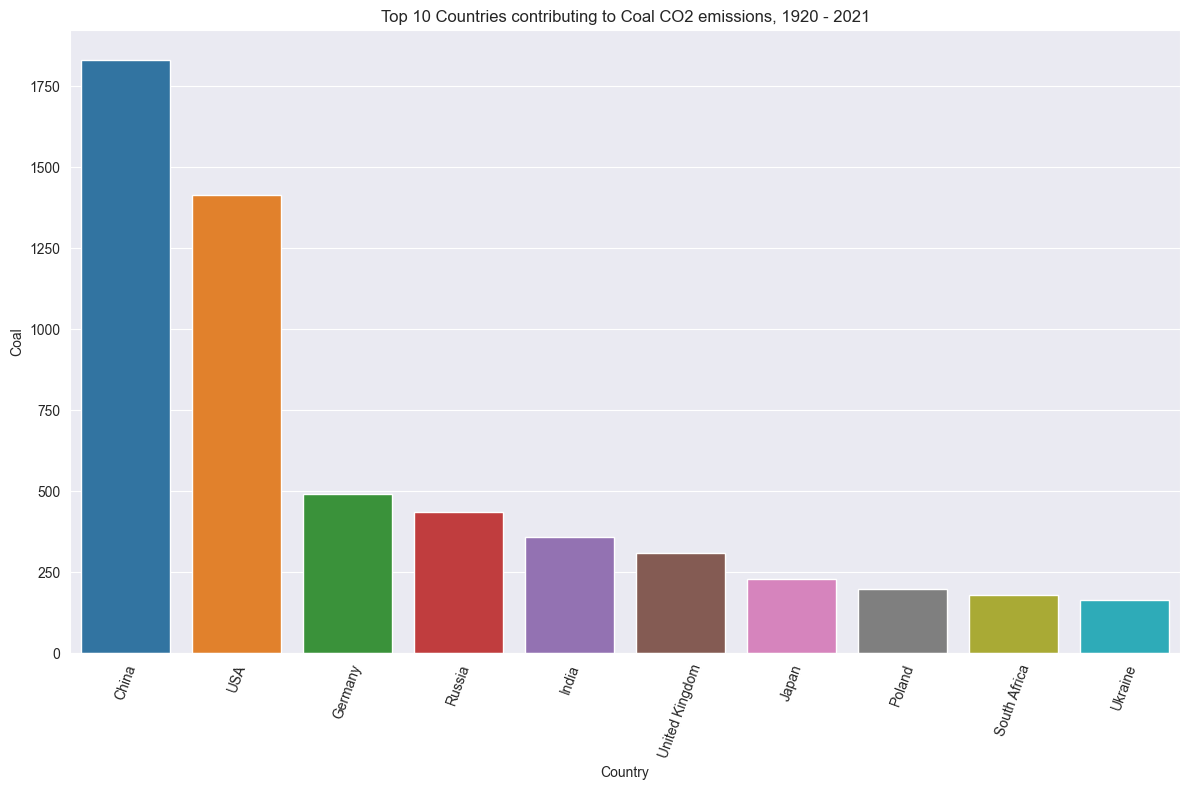

In [340]:
plt.figure(figsize=(12,8))
sns.barplot(coal_df.head(10), x ='Country', y='Coal', hue='Country')
plt.xticks(rotation=70)
plt.tight_layout()
plt.title(label='Top 10 Countries contributing to Coal CO2 emissions, 1920 - 2021')

In [341]:
oil_df = countries_df.sort_values('Oil', ascending=False)
oil_df.head(10)

,Coal,Oil,Gas,Total
Country,,,,
USA,1415.548412,1560.752764,763.976682,3805.065881
China,1830.672270,338.152385,70.215798,2441.254679
Japan,227.203584,324.733192,69.231892,643.915756
Russia,436.345846,321.412107,343.668769,1137.722073
Germany,491.471057,193.719744,70.365272,771.190280
France,126.169074,150.304292,35.913480,322.315822
Canada,82.761602,147.004037,81.065136,321.526322
India,357.628455,144.440256,24.342127,553.922077
Italy,40.018612,133.537857,53.996820,239.192220


Text(0.5, 1.0, 'Top 10 Countries contributing to Oil CO2 emissions, 1920 - 2021')

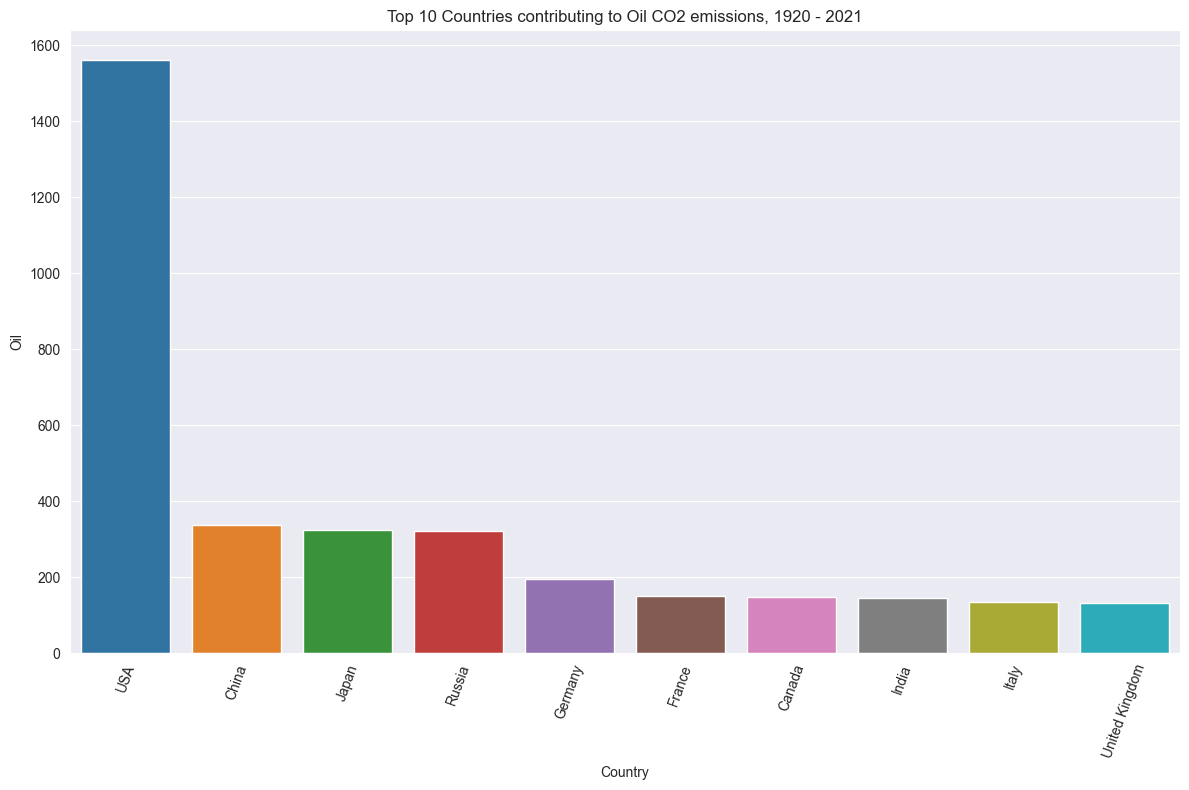

In [342]:
plt.figure(figsize=(12,8))
sns.barplot(oil_df.head(10), x ='Country', y='Oil', hue='Country')
plt.xticks(rotation=70)
plt.tight_layout()
plt.title(label='Top 10 Countries contributing to Oil CO2 emissions, 1920 - 2021')

In [343]:
gas_df = countries_df.sort_values('Gas', ascending=False)
gas_df.head(10)

,Coal,Oil,Gas,Total
Country,,,,
USA,1415.548412,1560.752764,763.976682,3805.065881
Russia,436.345846,321.412107,343.668769,1137.722073
Canada,82.761602,147.004037,81.065136,321.526322
Iran,2.103896,93.263518,73.650867,191.472398
United Kingdom,308.307883,131.413471,70.423844,519.255594
Germany,491.471057,193.719744,70.365272,771.190280
China,1830.672270,338.152385,70.215798,2441.254679
Japan,227.203584,324.733192,69.231892,643.915756
Ukraine,163.559706,65.152165,61.705467,297.146444


Text(0.5, 1.0, 'Top 10 Countries contributing to Gas CO2 emissions, 1920 - 2021')

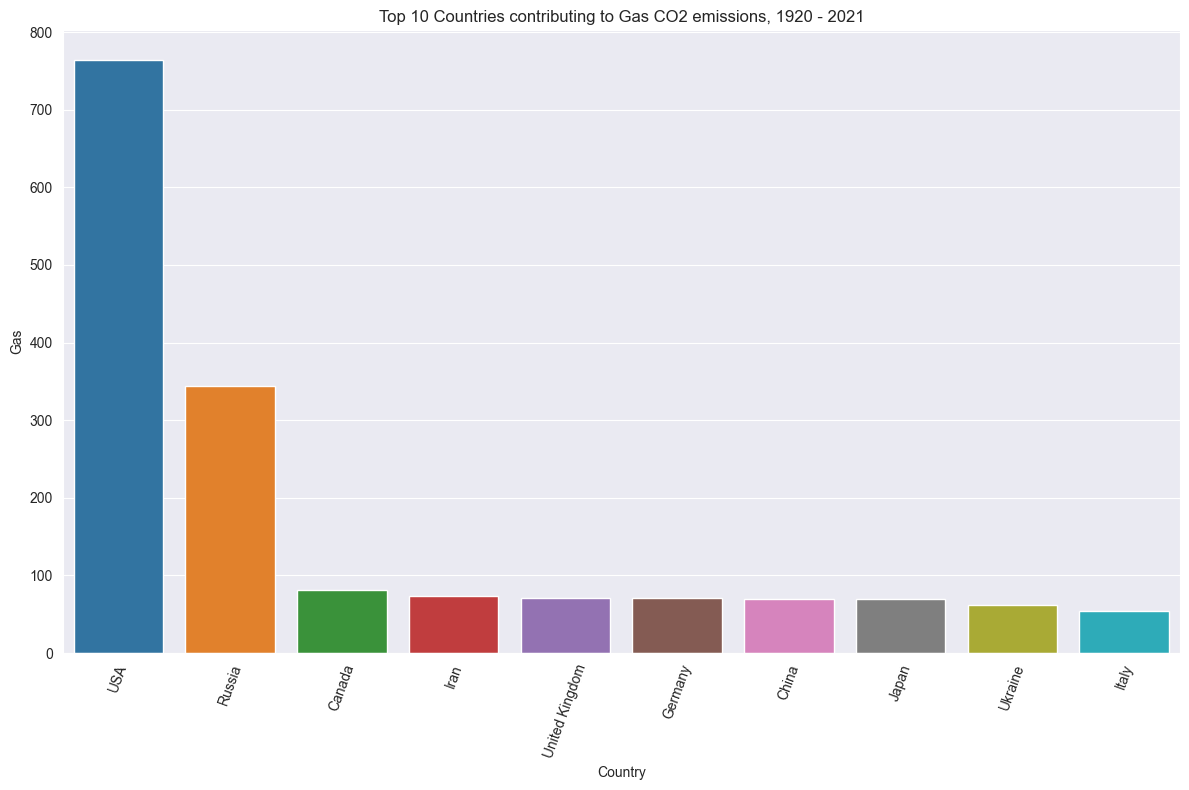

In [344]:
plt.figure(figsize=(12,8))
sns.barplot(gas_df.head(10), x ='Country', y='Gas', hue='Country')
plt.xticks(rotation=70)
plt.tight_layout()
plt.title(label='Top 10 Countries contributing to Gas CO2 emissions, 1920 - 2021')

USA appears in the top 3 in coal, oil and gas categories, followed by China contributing the most CO2 emissions through coal.

In [345]:
countries_df=countries_df.reset_index()
countries_df

,Country,Coal,Oil,Gas,Total
0,Afghanistan,0.565456,1.289973,0.198692,2.137187
1,Albania,0.654723,1.821945,0.163797,2.880774
2,Algeria,1.152038,16.212626,21.121073,47.671757
3,Andorra,0.000000,0.151809,0.000000,0.151809
4,Angola,0.015694,3.400259,0.452079,6.442309
...,...,...,...,...,...
225,Viet Nam,21.968810,13.808806,3.042654,45.075572
226,Wallis and Futuna Islands,0.000000,0.007579,0.000000,0.007579
227,Yemen,0.048797,5.834148,0.133678,6.388203
228,Zambia,1.175472,1.182496,0.000000,2.526094


In [346]:
top10 = countries_df.loc[(countries_df['Country']=='USA') | (countries_df['Country']=='China') | (countries_df['Country']=='Russia') | 
                        (countries_df['Country']=='Germany') | (countries_df['Country']=='Japan') | (countries_df['Country']=='India') |
                        (countries_df['Country']=='United Kingdom') | (countries_df['Country']=='France') | (countries_df['Country']=='Canada') |
                        (countries_df['Country']=='Ukraine')]
top10 = top10.set_index('Country')
top10

,Coal,Oil,Gas,Total
Country,,,,
Canada,82.761602,147.004037,81.065136,321.526322
China,1830.672270,338.152385,70.215798,2441.254679
France,126.169074,150.304292,35.913480,322.315822
Germany,491.471057,193.719744,70.365272,771.190280
India,357.628455,144.440256,24.342127,553.922077
Japan,227.203584,324.733192,69.231892,643.915756
Russia,436.345846,321.412107,343.668769,1137.722073
USA,1415.548412,1560.752764,763.976682,3805.065881
Ukraine,163.559706,65.152165,61.705467,297.146444


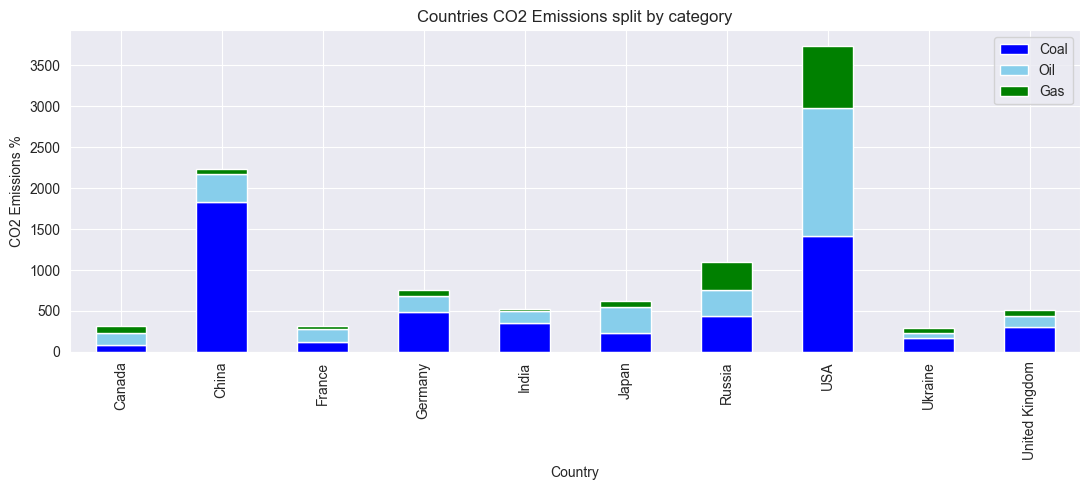

In [347]:
top10[['Coal', 'Oil', 'Gas']].plot(kind='bar', stacked=True, color=['blue', 'skyblue', 'green'])
plt.xlabel('Country')
plt.ylabel('CO2 Emissions %')
plt.title('Countries CO2 Emissions split by category')
plt.show()


The above stacked bar chart gives a good indication of the split between coal, oil and gas amongst the top 10 CO2 emitting countries between 1920 and 2021. We can see that coal is the predominant culprit, followed by oil and then gas. China could consider alternative options to coal and USA could consider alternatives to Oil. Russia seems to have an even split betweem coal and oil and gas. Policy changes and more sustainable methods need to be incorporated to reduce CO2 emissions.

### Top 10 Countries CO2 emissions, 2000 - 2021

The biggest rise in CO2 emissions seems to be between 2000 and 2020. Let's take a closer look at this period. 

In [348]:
#let's consider only the data from actual countries and from 2000 onwrds
filtered_data = data[(data['Country']!='Global') & (data['Country']!='International Transport') & (data['Year']>='2000')]
filtered_data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
250,Afghanistan,AFG,2000-01-01,1.047128,0.003664,0.787760,0.223504,0.010216,0.021984,0.0,0.053581
251,Afghanistan,AFG,2001-01-01,1.069098,0.069616,0.762112,0.208848,0.006538,0.021984,0.0,0.054300
252,Afghanistan,AFG,2002-01-01,1.340995,0.055109,0.727438,0.547416,0.011033,0.000000,0.0,0.063856
253,Afghanistan,AFG,2003-01-01,1.559602,0.091813,0.991575,0.466408,0.009807,0.000000,0.0,0.068871
254,Afghanistan,AFG,2004-01-01,1.237247,0.091600,0.908672,0.227168,0.009807,0.000000,0.0,0.052529


In [349]:
filtered_data.shape

(5060, 11)

In [350]:
filtered_data['Country']

250      Afghanistan
251      Afghanistan
252      Afghanistan
253      Afghanistan
254      Afghanistan
            ...     
62555       Zimbabwe
62556       Zimbabwe
62557       Zimbabwe
62558       Zimbabwe
62559       Zimbabwe
Name: Country, Length: 5060, dtype: object

<Axes: title={'center': 'Top 10 Countries Total Emissions, 2000 - 2021'}>

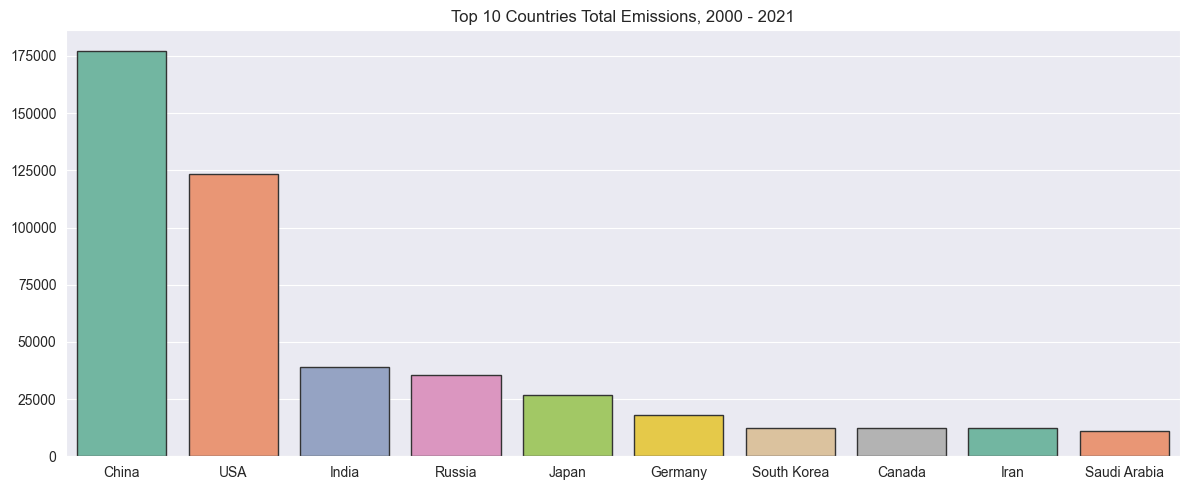

In [351]:
countries = list(filtered_data.drop(columns=['Year']).groupby('Country').sum().sort_values(by='Total',ascending=False).index)
values = list(filtered_data.drop(columns=['Year']).groupby('Country').sum().sort_values(by='Total',ascending=False)['Total'])

plt.figure(figsize=(12,5))
plt.title(label='Top 10 Countries Total Emissions, 2000 - 2021')
sns.set_style('darkgrid')
sns.barplot(x=countries[:10], y=values[:10], hue = countries[:10], palette='Set2',edgecolor='.2', legend='auto')

### China, CO2 emissions 2000 - 2021

In [352]:
#let's take a closer look at China 
china_data = filtered_data[filtered_data['Country']=='China']
china_data

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
10858,China,CHN,2000-01-01,3644.464203,2601.736784,648.685552,59.796480,244.388200,0.000000,89.857187,2.883053
10859,China,CHN,2001-01-01,3723.730766,2637.654976,659.300160,67.157456,270.828174,0.000000,88.790000,2.925760
10860,China,CHN,2002-01-01,4112.459057,3018.634032,653.086016,53.992704,296.590305,0.000000,90.156000,3.210536
10861,China,CHN,2003-01-01,4827.445998,3601.712000,727.098816,60.745456,345.186136,0.000000,92.703590,3.745477
10862,China,CHN,2004-01-01,5223.754656,3835.288336,839.092640,71.521280,379.992160,0.000000,97.860240,4.028136
10863,China,CHN,2005-01-01,5876.555340,4424.389920,850.172576,84.957168,411.648776,0.000000,105.386900,4.503496
10864,China,CHN,2006-01-01,6488.803816,4905.374192,898.533712,103.753488,470.086624,0.000000,111.055800,4.941642
10865,China,CHN,2007-01-01,6978.611952,5289.903664,927.351072,129.515072,514.980844,0.000000,116.861300,5.280773
10866,China,CHN,2008-01-01,7496.832207,5729.473744,970.117280,149.674400,525.924483,0.000000,121.642300,5.636008
10867,China,CHN,2009-01-01,7886.532768,6028.500112,982.347712,164.403680,583.560264,0.000000,127.721000,5.889315


Text(0.5, 1.0, 'China Total Emissions Trend, 2000 - 2021')

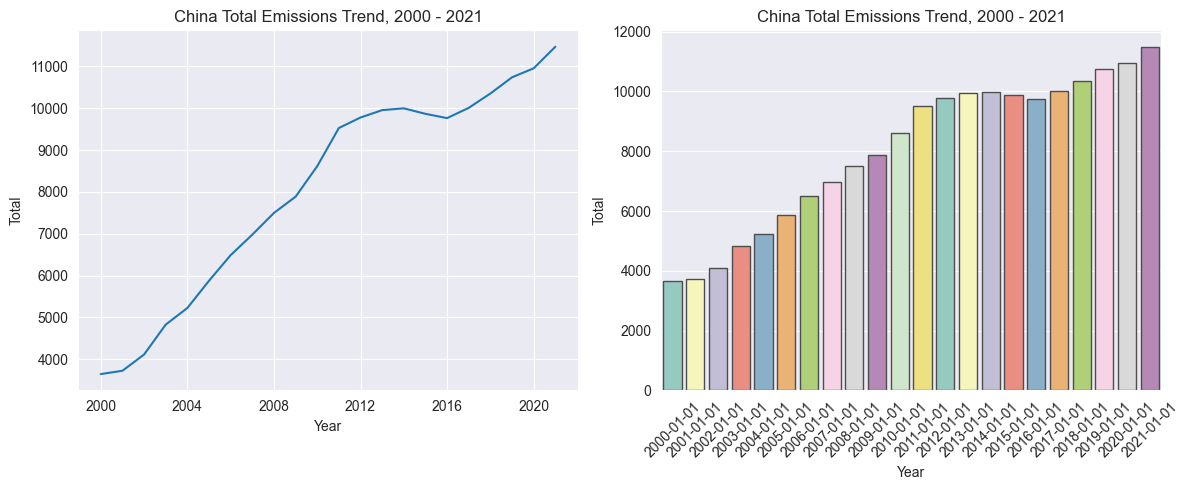

In [353]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.lineplot(x='Year', y ='Total', data=china_data)
plt.title(label='China Total Emissions Trend, 2000 - 2021')

plt.subplot(122)
sns.barplot(x='Year', y='Total', data=china_data, hue='Year', palette='Set3', edgecolor='.3', legend=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title(label='China Total Emissions Trend, 2000 - 2021')


### CO2 Emissions, 2000 - 2021

In [354]:
filtered_data.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [355]:
#let's consider the average annual emissions for all categories
filtered_df = filtered_data.copy()
filtered_df.set_index('Year', inplace=True)

#### CO2 emissions per capita, 2000 - 2021

In [356]:
percapita_df = filtered_df.groupby('Country')[['Per Capita']].mean().sort_values('Per Capita', ascending=False).head(10).reset_index()
percapita_df

,Country,Per Capita
0,Qatar,45.763194
1,Curaçao,30.568303
2,Trinidad and Tobago,27.748401
3,Kuwait,27.003772
4,United Arab Emirates,24.215091
5,Bahrain,23.373379
6,Luxembourg,19.860752
7,Aruba,18.752751
8,Brunei Darussalam,18.739232
9,Sint Maarten (Dutch part),18.344077


Text(0.5, 1.0, 'Top 10 Countries by Total Emissions Per Capita, 2000 - 2021')

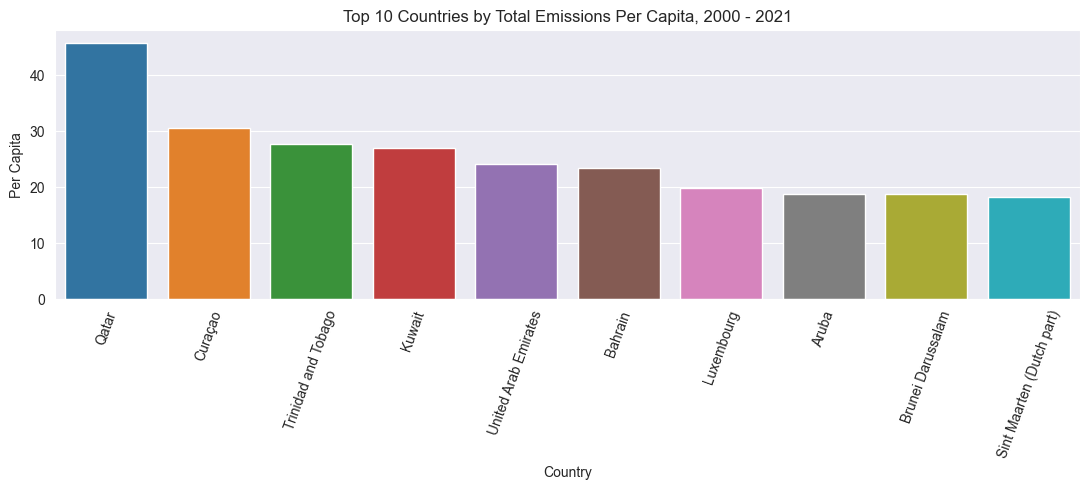

In [357]:
sns.barplot(percapita_df, x ='Country', y='Per Capita', hue='Country')
plt.xticks(rotation=70)
plt.tight_layout()
plt.title(label='Top 10 Countries by Total Emissions Per Capita, 2000 - 2021')

#### Annual Average CO2 Emissions, 2000 - 2021

In [358]:
annual_avg =filtered_df[['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].resample('Y').mean().round(2)
annual_avg

,Total,Coal,Oil,Gas,Cement,Flaring,Other
Year,,,,,,,
2000-12-31,107.26,40.01,41.38,20.57,3.14,1.21,0.94
2001-12-31,108.21,40.24,41.79,20.75,3.28,1.22,0.93
2002-12-31,110.80,42.08,41.69,21.33,3.46,1.30,0.94
2003-12-31,116.61,45.73,42.82,22.09,3.71,1.30,0.96
2004-12-31,120.58,47.27,44.08,22.86,3.96,1.41,1.00
2005-12-31,124.66,50.19,44.33,23.39,4.19,1.50,1.05
2006-12-31,128.69,52.99,44.57,23.94,4.57,1.51,1.10
2007-12-31,132.41,55.55,44.48,24.76,4.91,1.58,1.13
2008-12-31,134.89,57.36,44.30,25.50,4.97,1.63,1.13


Text(0.5, 1.0, 'Average Total CO2 Emissions, 2000 - 2021')

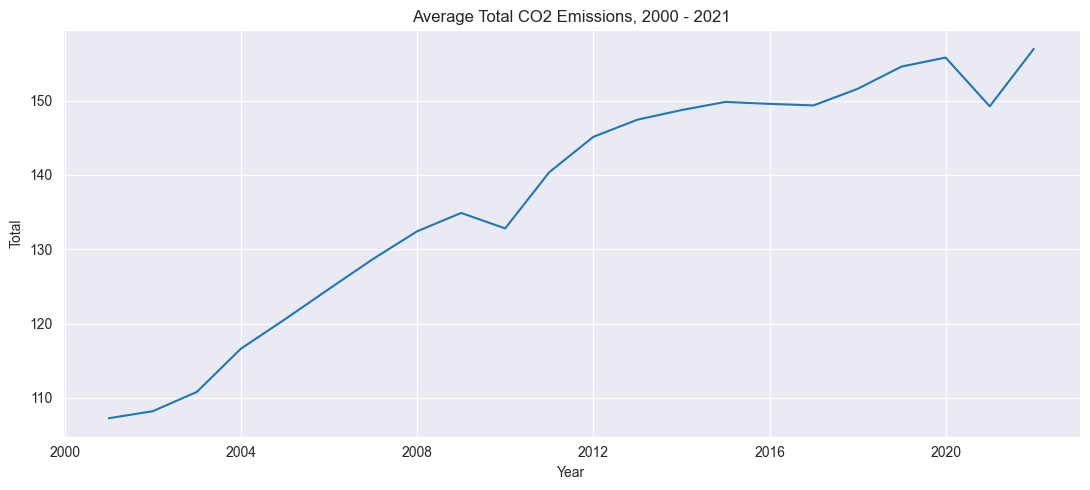

In [359]:
sns.lineplot(data=annual_avg['Total'])
plt.title('Average Total CO2 Emissions, 2000 - 2021')

Text(0.5, 1.0, 'Average CO2 Emissions by Fossil Fuels, 2000 - 2021')

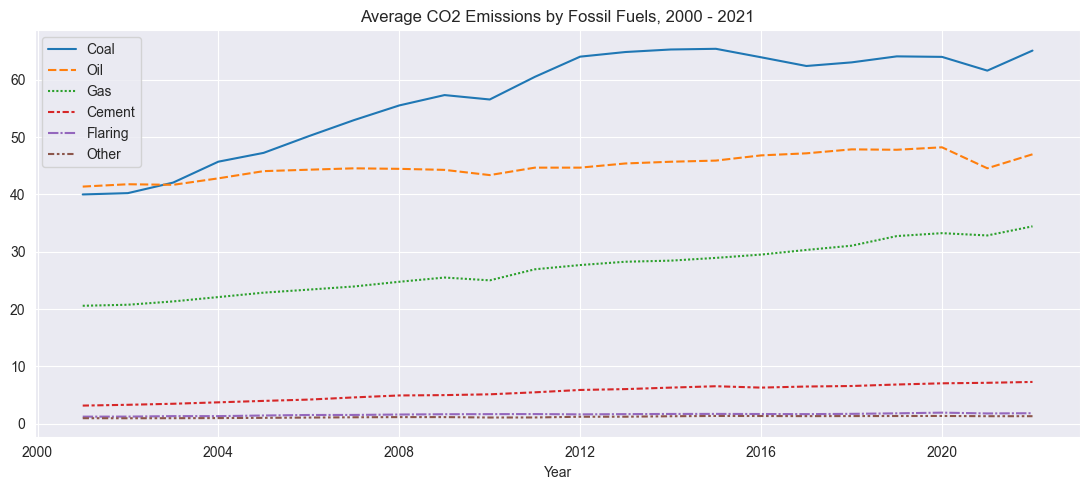

In [360]:
sns.lineplot(data=annual_avg[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']])
plt.title(label='Average CO2 Emissions by Fossil Fuels, 2000 - 2021')

The above graph indicates that coal, followed by oil and gas are on average the top emittors of CO2. Between 2020 and 2021 there is a slight dip across the board, likely due to the pandemic. Other than that, there seems to be an upward trend. 

### Correlations 

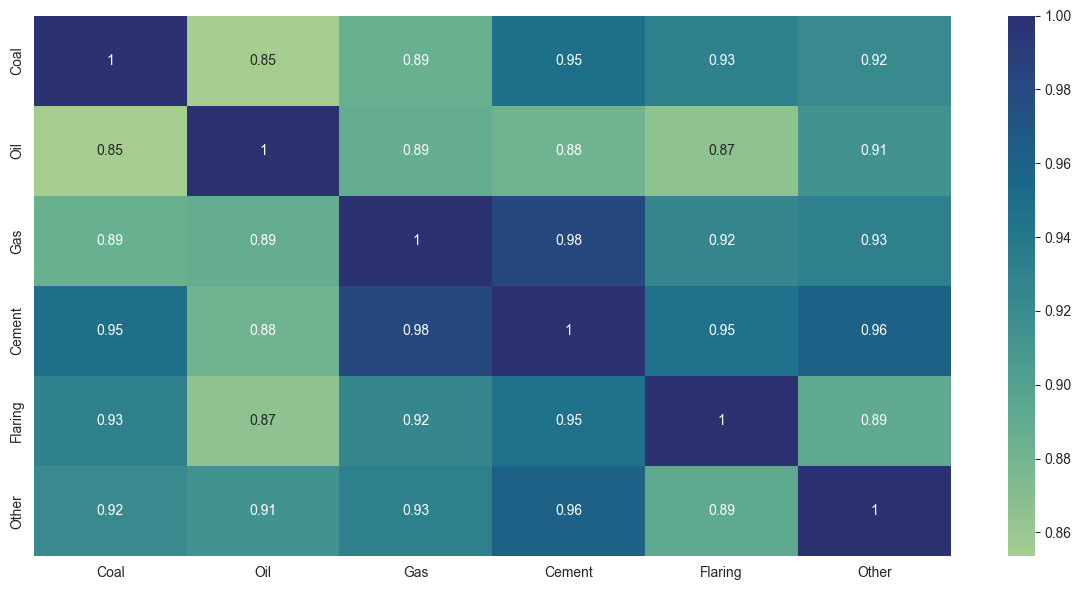

In [361]:
plt.figure(figsize=(12,6))
sns.heatmap(annual_avg[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']].corr(), cmap='crest', annot=True)
plt.show()

Overall, there is a strong correlation between all of the materials, however, cement seems to have a strong correlation with all of the other contributors. The strongest correlation is with gas, followed by other industrial processes.  Oil has a weaker correlation across the board. 

Text(0.5, 1.0, 'Relationship between Gas and Cement Average CO2 Emissions')

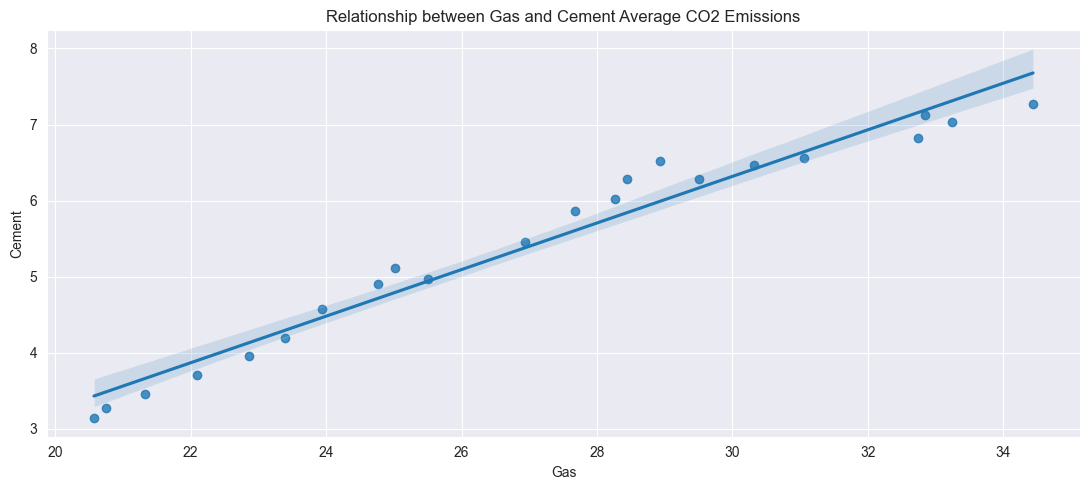

In [362]:
sns.regplot(data=annual_avg, x='Gas', y='Cement')
plt.title(label='Relationship between Gas and Cement Average CO2 Emissions')

Text(0.5, 1.0, 'Relationship between Coal and Cement Average CO2 Emissions')

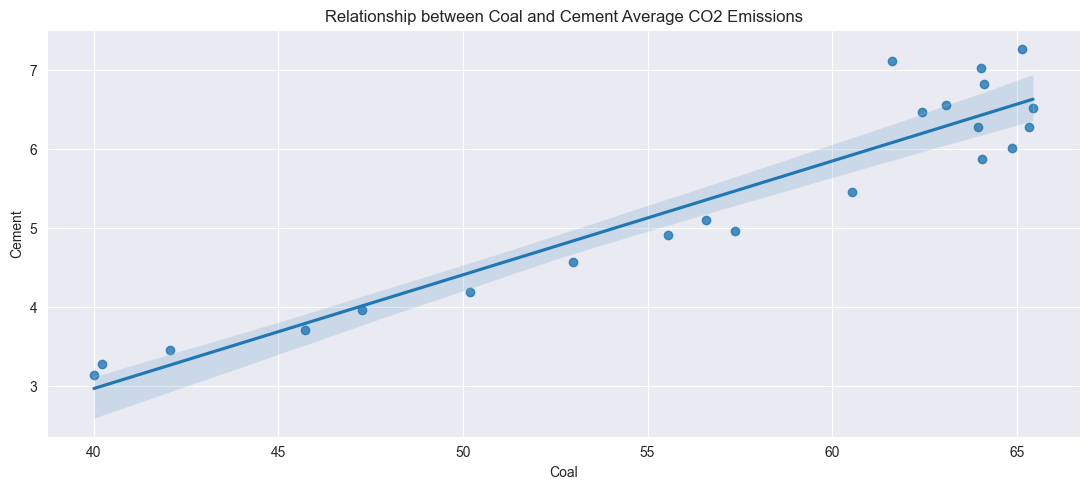

In [363]:
sns.regplot(data=annual_avg, x='Coal', y='Cement')
plt.title(label='Relationship between Coal and Cement Average CO2 Emissions')

Text(0.5, 1.0, 'Relationship between Coal and Oil Average CO2 Emissions')

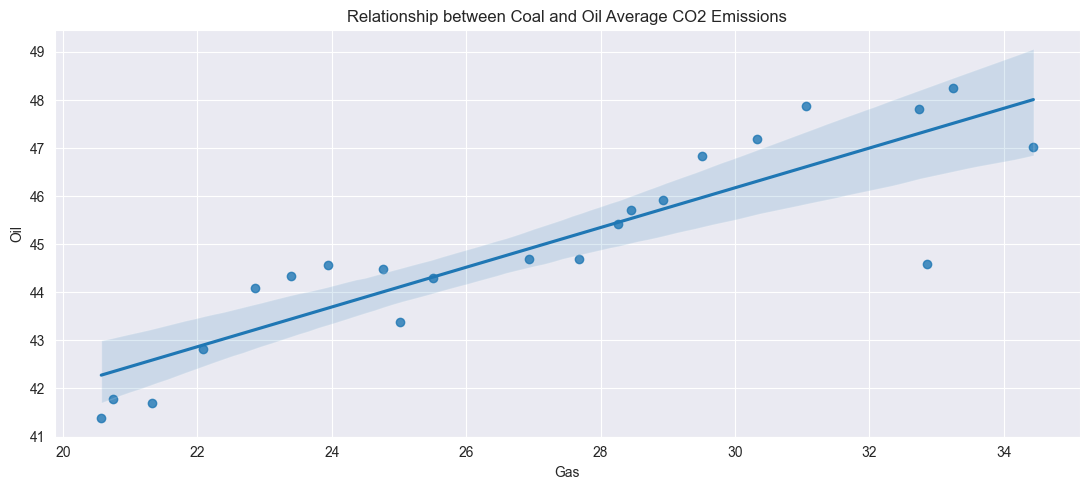

In [364]:
sns.regplot(data=annual_avg, x='Gas', y='Oil')
plt.title(label='Relationship between Coal and Oil Average CO2 Emissions')

Text(0.5, 1.0, 'Relationship between Coal and Gas Average CO2 Emissions')

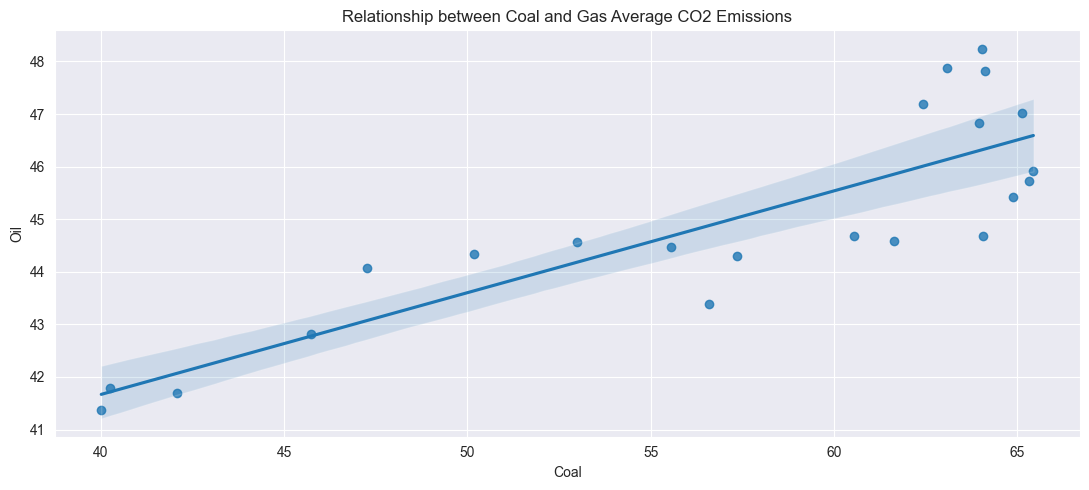

In [365]:
sns.regplot(data=annual_avg, x='Coal', y='Oil')
plt.title(label='Relationship between Coal and Gas Average CO2 Emissions')

### Forecasting next 10 years

Let's now consider forecasting total CO2 emissions over the next 10 years.

In [366]:
data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [367]:
annual_avg['Total'].describe()

count     22.000000
mean     137.069091
std       16.290476
min      107.260000
25%      125.667500
50%      142.740000
75%      149.517500
max      156.970000
Name: Total, dtype: float64

In [368]:
mean_total = np.mean(annual_avg['Total'])
mean_total

137.0690909090909

In [369]:
median_total = np.median(annual_avg['Total'])
median_total

142.74

In [370]:
std_total = np.std(annual_avg['Total'])
std_total

15.915932243307452

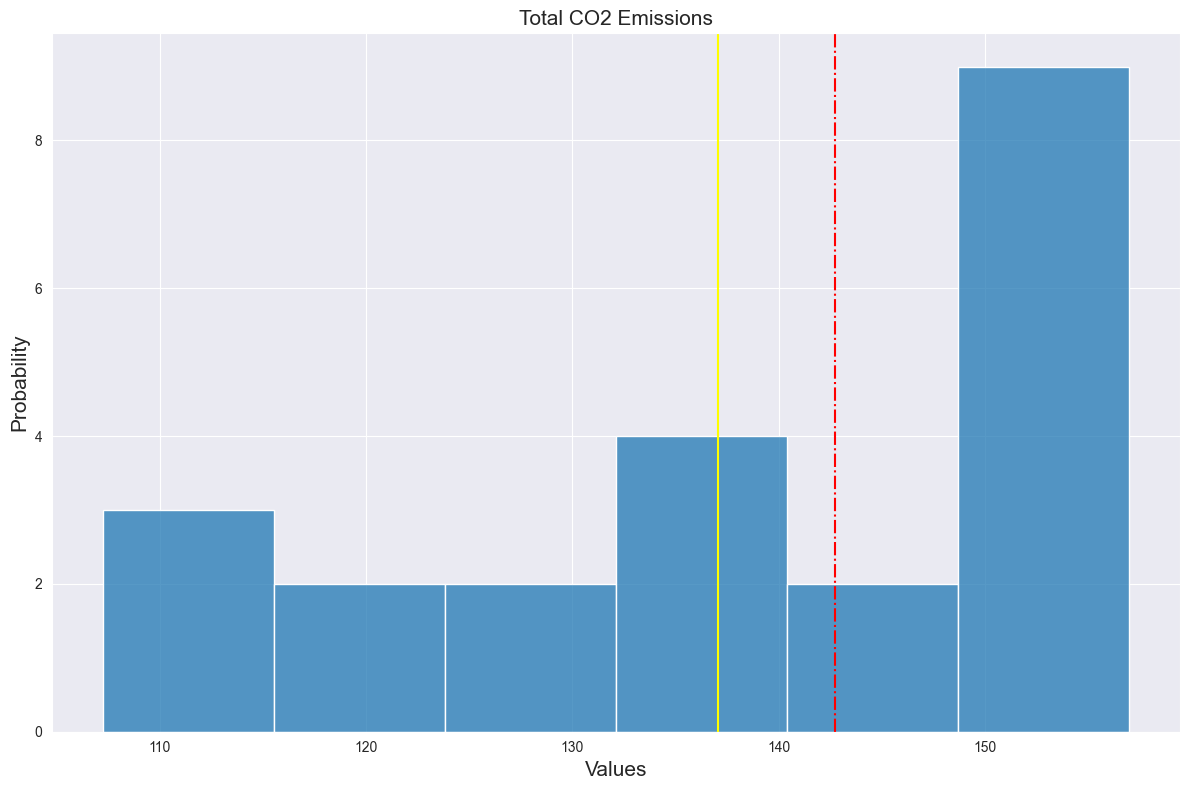

In [371]:
plt.figure(figsize=(12,8))

sns.histplot(x=annual_avg['Total'])

plt.title('Total CO2 Emissions', fontsize='15')

plt.axvline(x=mean_total, color='yellow', linestyle='-')
plt.axvline(x=median_total, color='r', linestyle='-.')

plt.xlabel('Values', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.show()

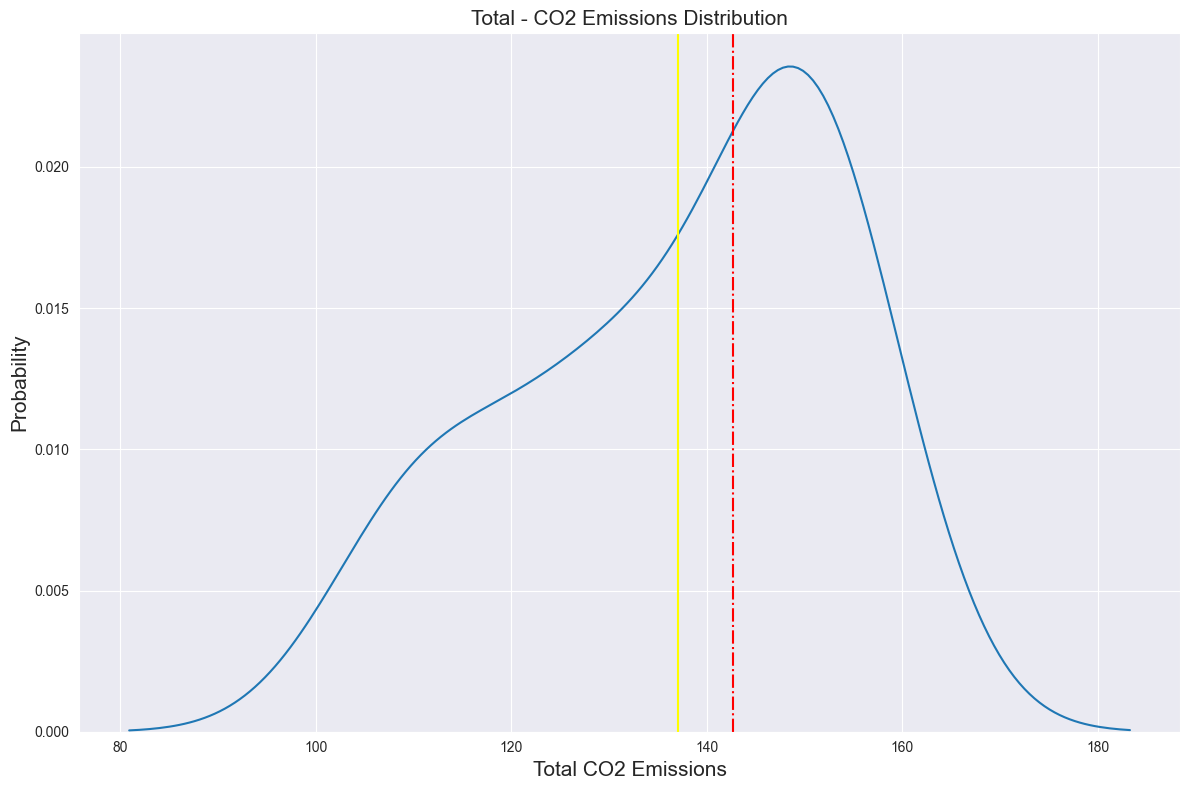

In [372]:
plt.figure(figsize=(12,8))

sns.kdeplot(x=annual_avg['Total'])

plt.title('Total - CO2 Emissions Distribution', fontsize='15')

plt.axvline(x=mean_total, color='yellow', linestyle='-')
plt.axvline(x=median_total, color='r', linestyle='-.')

plt.xlabel('Total CO2 Emissions', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.show()

The distribution of Total CO2 emissions data is skewed to the left (i.e. negative - the mean CO2 emissions total is less than the median CO2 emissions).

In [373]:
mean_cement = np.mean(annual_avg['Cement'])
mean_cement

5.40909090909091

In [374]:
median_cement = np.median(annual_avg['Cement'])
median_cement

5.665

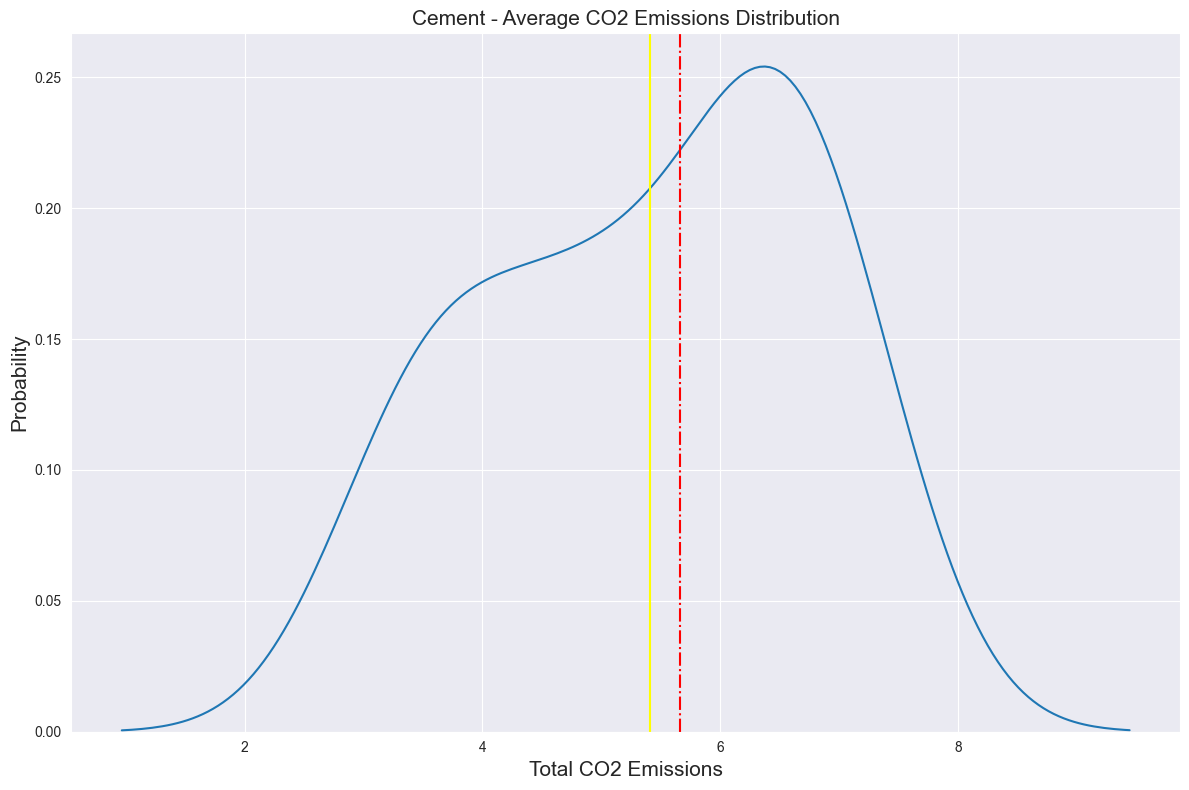

In [375]:
plt.figure(figsize=(12,8))

sns.kdeplot(x=annual_avg['Cement'])

plt.title('Cement - Average CO2 Emissions Distribution', fontsize='15')

plt.axvline(x=mean_cement, color='yellow', linestyle='-')
plt.axvline(x=median_cement, color='r', linestyle='-.')

plt.xlabel('Total CO2 Emissions', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.show()

#### Feature Engineering 

In order for a feature to be useful, it must have a relationship to the target that your model is able to learn (e.g. Linear models are only able to learn linear relationships). Hence, when using a linear model our goal is to transform the features to make their relationship to the target linear. 

To begin, let's consider the feature utility metric - mutual information (MI) which measures the relationship between a potential feature and the target. 

In [376]:
a = data.copy()

In [377]:
a.shape

(63104, 11)

In [378]:
annual_avg.head()

,Total,Coal,Oil,Gas,Cement,Flaring,Other
Year,,,,,,,
2000-12-31,107.26,40.01,41.38,20.57,3.14,1.21,0.94
2001-12-31,108.21,40.24,41.79,20.75,3.28,1.22,0.93
2002-12-31,110.80,42.08,41.69,21.33,3.46,1.30,0.94
2003-12-31,116.61,45.73,42.82,22.09,3.71,1.30,0.96
2004-12-31,120.58,47.27,44.08,22.86,3.96,1.41,1.00


In [379]:
annual_avg.shape


(22, 7)

In [380]:
a.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [381]:
data.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [382]:
data.shape

(63104, 11)

In [383]:
X = data.copy()
y = X.pop('Total')

Scikit-learn has two MI metrics. We will use mutual_info_regression as it's suited to real-value targets like our Total emissions column.

In [384]:
X.dtypes

Country                       object
ISO 3166-1 alpha-3            object
Year                  datetime64[ns]
Coal                         float64
Oil                          float64
Gas                          float64
Cement                       float64
Flaring                      float64
Other                        float64
Per Capita                   float64
dtype: object

In [385]:
#extract year only from datetime column 
X['year'] = X['Year'].dt.year


In [386]:
X = X.drop(columns=['Year', 'Country', 'ISO 3166-1 alpha-3'])

In [387]:
X.columns

Index(['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita',
       'year'],
      dtype='object')

In [388]:
#convert to int data type
X[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita', 'year']] = X[['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita', 'year']].astype(int)

In [389]:
X.dtypes

Coal          int32
Oil           int32
Gas           int32
Cement        int32
Flaring       int32
Other         int32
Per Capita    int32
year          int32
dtype: object

In [390]:
y

0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
             ...     
63099    36096.739276
63100    36826.506600
63101    37082.558969
63102    35264.085734
63103    37123.850352
Name: Total, Length: 63104, dtype: float64

In [391]:
discrete_features = X.dtypes == int

In [392]:
X

,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,year
0,0,0,0,0,0,0,0,1750
1,0,0,0,0,0,0,0,1751
2,0,0,0,0,0,0,0,1752
3,0,0,0,0,0,0,0,1753
4,0,0,0,0,0,0,0,1754
...,...,...,...,...,...,...,...,...
63099,14506,12242,7144,1507,391,302,4,2017
63100,14746,12266,7529,1569,412,302,4,2018
63101,14725,12345,7647,1617,439,306,4,2019
63102,14174,11191,7556,1637,407,296,4,2020


In [393]:
y = y.astype(int)

In [394]:
y.dtypes

dtype('int32')

In [395]:
discrete_features

Coal          True
Oil           True
Gas           True
Cement        True
Flaring       True
Other         True
Per Capita    True
year          True
dtype: bool

In [396]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::]

Oil           0.571888
Coal          0.504338
Per Capita    0.252613
Gas           0.245663
Cement        0.224638
year          0.198984
Flaring       0.090446
Other         0.064323
Name: MI Scores, dtype: float64

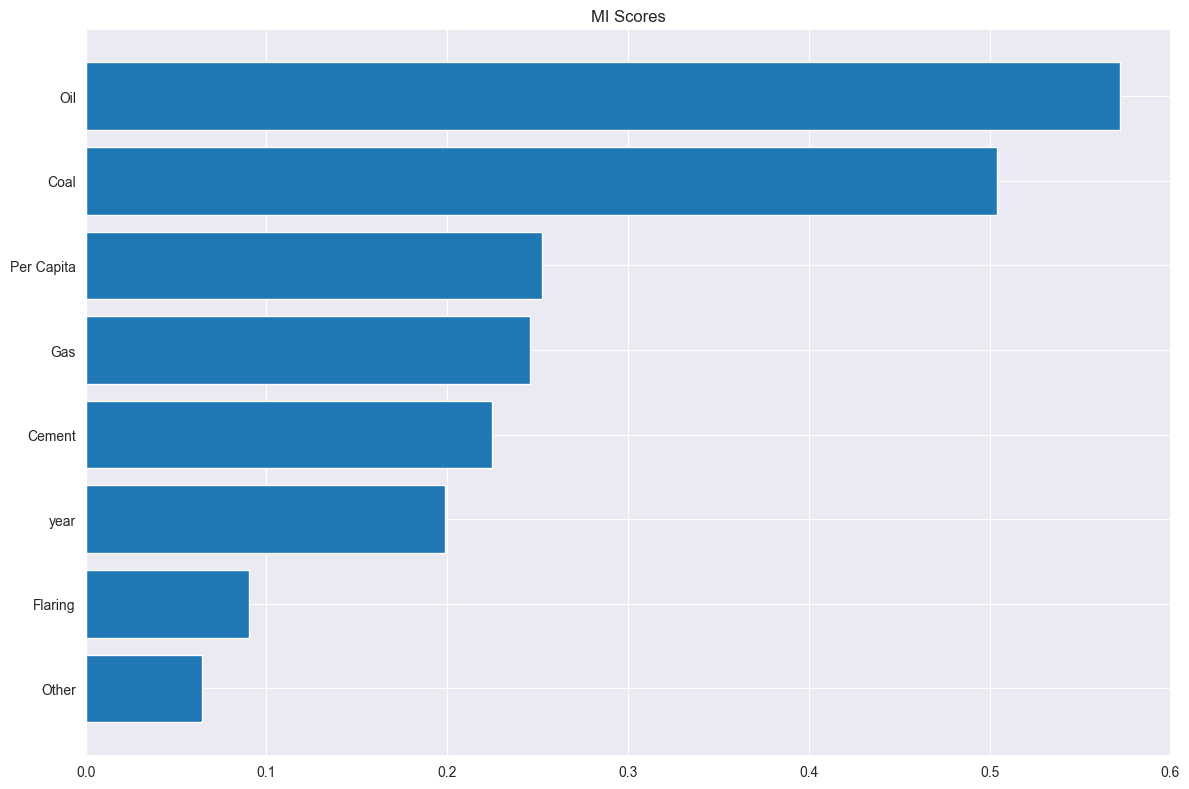

In [397]:
def plot_mi_scores(scores):
    scores=scores.sort_values(ascending=True)
    width=np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('MI Scores')
    
plt.figure(figsize=(12,8))
plot_mi_scores(mi_scores)

<Axes: xlabel='Oil', ylabel='Total'>

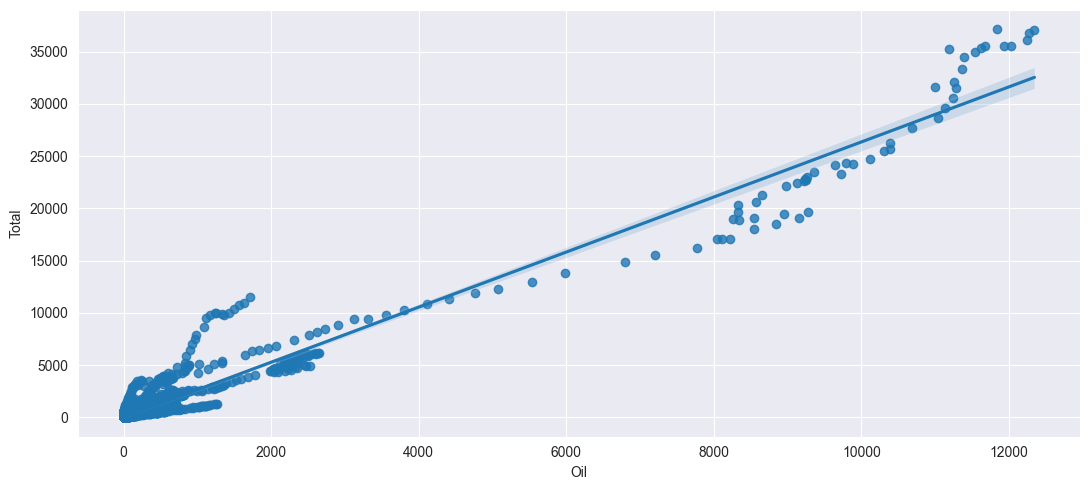

In [398]:
sns.regplot(x='Oil', y='Total', data=data)

In [399]:
# let's consider time-related features

train_df1 = data.groupby(['Year']).Total.mean().round(2).reset_index()
train_df1.head()

,Year,Total
0,1750-01-01,0.08
1,1751-01-01,0.08
2,1752-01-01,0.08
3,1753-01-01,0.08
4,1754-01-01,0.08


In [400]:
avg_totals = train_df1.copy()
time = np.arange(len(avg_totals.index))
avg_totals['Time'] = time
avg_totals.head()

,Year,Total,Time
0,1750-01-01,0.08,0
1,1751-01-01,0.08,1
2,1752-01-01,0.08,2
3,1753-01-01,0.08,3
4,1754-01-01,0.08,4


In [401]:
from sklearn.linear_model import LinearRegression

X = avg_totals.loc[:, ['Time']] # feature
y = avg_totals.loc[:, 'Total'] # target

In [402]:
X

,Time
0,0
1,1
2,2
3,3
4,4
...,...
267,267
268,268
269,269
270,270


In [403]:
y

0        0.08
1        0.08
2        0.08
3        0.08
4        0.08
        ...  
267    311.18
268    317.47
269    319.68
270    304.00
271    320.03
Name: Total, Length: 272, dtype: float64

In [404]:
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

y_pred

0      -65.109399
1      -64.222614
2      -63.335829
3      -62.449044
4      -61.562259
          ...    
267    171.662185
268    172.548970
269    173.435755
270    174.322540
271    175.209325
Length: 272, dtype: float64

Text(0.5, 1.0, 'Time Plot of Total Emissions')

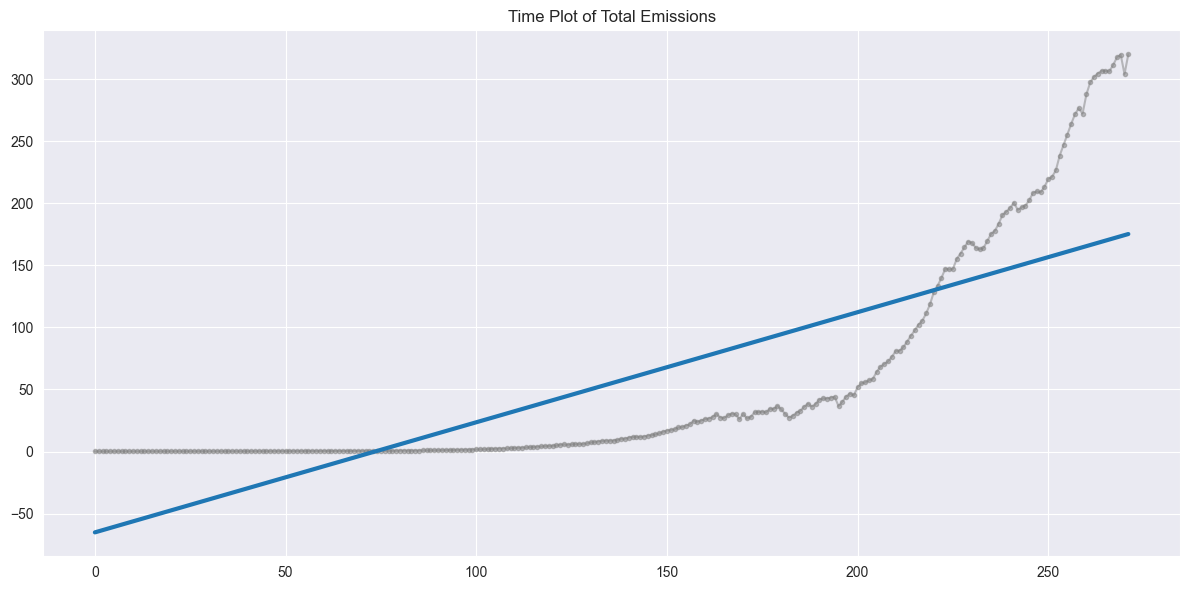

In [405]:
plot_params = {"color":"grey", "style":".-"}
fig, ax = plt.subplots(figsize=(12,6))
ax = y.plot(**plot_params, alpha=0.5) # actual
ax = y_pred.plot(ax=ax, linewidth=3) # predicted
ax.set_title('Time Plot of Total Emissions')

In [406]:
# let's consider time-related features

train_df2 = data.groupby(['Year']).Oil.mean().round(2).reset_index()
train_df2.head()

,Year,Oil
0,1750-01-01,0.0
1,1751-01-01,0.0
2,1752-01-01,0.0
3,1753-01-01,0.0
4,1754-01-01,0.0


In [407]:
avg_oil = train_df2.copy()
time = np.arange(len(avg_oil.index))
avg_oil['Time'] = time
avg_oil.head()

,Year,Oil,Time
0,1750-01-01,0.0,0
1,1751-01-01,0.0,1
2,1752-01-01,0.0,2
3,1753-01-01,0.0,3
4,1754-01-01,0.0,4


In [408]:
from sklearn.linear_model import LinearRegression

X = avg_oil.loc[:, ['Time']] # feature
y = avg_oil.loc[:, 'Oil'] # target



In [409]:
X

,Time
0,0
1,1
2,2
3,3
4,4
...,...
267,267
268,268
269,269
270,270


In [410]:
y

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
        ...  
267    105.54
268    105.74
269    106.43
270     96.48
271    102.04
Name: Oil, Length: 272, dtype: float64

In [411]:
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

y_pred

0     -25.289716
1     -24.961453
2     -24.633191
3     -24.304929
4     -23.976667
         ...    
267    62.356299
268    62.684561
269    63.012823
270    63.341086
271    63.669348
Length: 272, dtype: float64

Text(0.5, 1.0, 'Time Plot of Oil carbon Emissions')

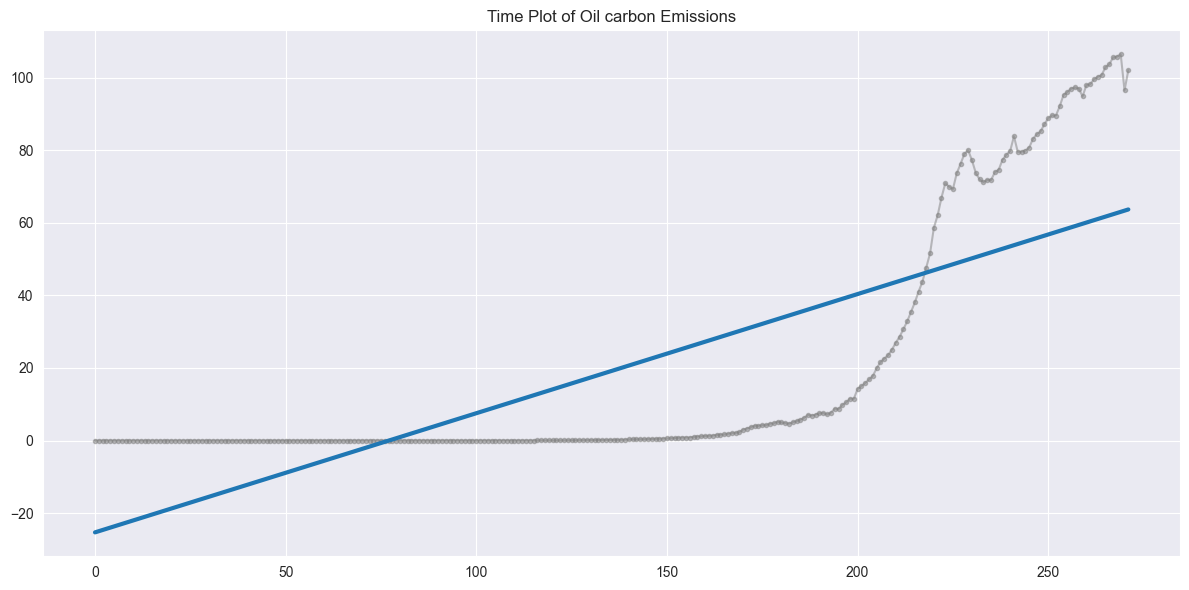

In [412]:
plot_params = {"color":"grey", "style":".-"}
fig, ax = plt.subplots(figsize=(12,6))
ax = y.plot(**plot_params, alpha=0.5) # actual
ax = y_pred.plot(ax=ax, linewidth=3) # predicted
ax.set_title('Time Plot of Oil carbon Emissions')

In [413]:
# fit a lag feature to annual avg oil carbon emissions

lag_1 = avg_oil['Oil'].shift(1)
avg_oil['lag_1'] = lag_1

X=avg_oil.loc[:, ['lag_1']] # feature
X.dropna(inplace=True)

y=avg_oil.loc[:, 'Oil'] # target

y, X = y.align(X, join='inner')

model=LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

y_pred

1        0.184955
2        0.184955
3        0.184955
4        0.184955
5        0.184955
          ...    
267    104.886467
268    106.795641
269    106.997670
270    107.694670
271     97.643729
Length: 271, dtype: float64

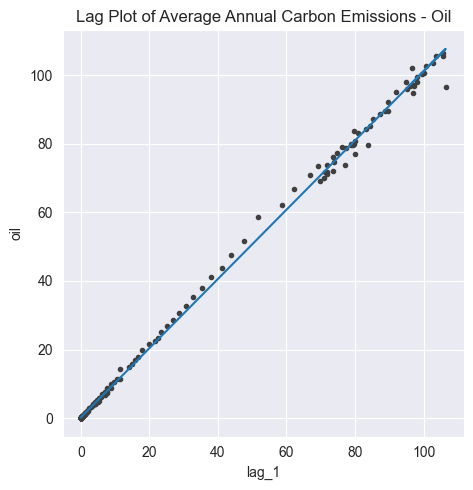

In [414]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='oil', xlabel='lag_1', title='Lag Plot of Average Annual Carbon Emissions - Oil');

The above lag plot shows a positive relationship and therefore an observation can be predicted from previous observations. 

In [415]:
# Let's consider the trend of carbon emissions using a moving average plot 

In [416]:
avg_oil

,Year,Oil,Time,lag_1
0,1750-01-01,0.00,0,NaN
1,1751-01-01,0.00,1,0.00
2,1752-01-01,0.00,2,0.00
3,1753-01-01,0.00,3,0.00
4,1754-01-01,0.00,4,0.00
...,...,...,...,...
267,2017-01-01,105.54,267,103.65
268,2018-01-01,105.74,268,105.54
269,2019-01-01,106.43,269,105.74
270,2020-01-01,96.48,270,106.43


In [417]:
avg_oil_small_df = avg_oil.loc[avg_oil['Year']>='1920-01-01']
avg_oil_small_df

,Year,Oil,Time,lag_1
170,1920-01-01,3.03,170,2.35
171,1921-01-01,3.31,171,3.03
172,1922-01-01,3.68,172,3.31
173,1923-01-01,4.08,173,3.68
174,1924-01-01,4.06,174,4.08
...,...,...,...,...
267,2017-01-01,105.54,267,103.65
268,2018-01-01,105.74,268,105.54
269,2019-01-01,106.43,269,105.74
270,2020-01-01,96.48,270,106.43


In [418]:
avg_oil_small_df = avg_oil_small_df.set_index('Year').to_period('Y')
avg_oil_small_df.head()

,Oil,Time,lag_1
Year,,,
1920,3.03,170,2.35
1921,3.31,171,3.03
1922,3.68,172,3.31
1923,4.08,173,3.68
1924,4.06,174,4.08


In [419]:
avg_oil_small_df['Oil'].describe()

count    102.000000
mean      50.857549
std       37.423262
min        3.030000
25%        9.042500
50%       60.360000
75%       83.647500
max      106.430000
Name: Oil, dtype: float64

<Axes: title={'center': 'Average Carbon Emissions from Oil from 1920 to 2021 - 365-Day Moving Average (smaller window size)'}, xlabel='Year'>

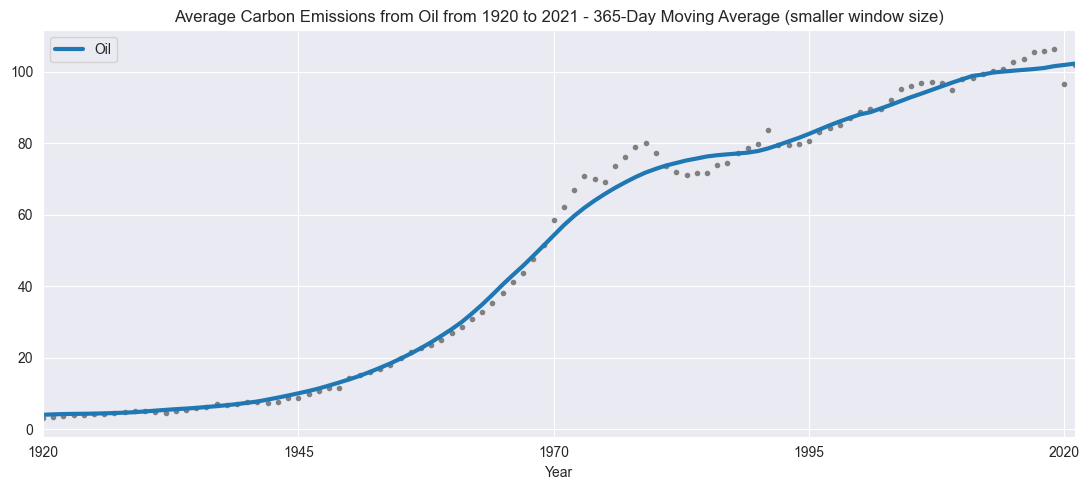

In [420]:
plt.rc("figure", autolayout=True, figsize=(11,5))

moving_average = avg_oil_small_df['Oil'].rolling(
window=18,           #365-day window (useful for capturing long-term trends and seasonality)
center=True,          #puts the average at the centre of the window
min_periods=9,      #choose about half the window size
).mean()              #compute the mean     

ax = avg_oil_small_df['Oil'].plot(style='.', color='0.5')
moving_average.plot(ax=ax, linewidth=3, title='Average Carbon Emissions from Oil from 1920 to 2021 - 365-Day Moving Average (smaller window size)', legend=True)

There is a clear upward trend in carbon emissions from oil, let's attempt to model it using a time-step feature. 

In [421]:
#engineer time dummy 

from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=avg_oil_small_df.index,  # dates from the training data
    constant=True,              # dummy feature for the bias (y_intercept)
    order=1,                    # the time dummy (1:linear trend, 2:quadratic, 3:cubic etc.)
    drop=True,                  # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X1 = dp.in_sample()

X1.head()

,const,trend
Year,,
1920,1.0,1.0
1921,1.0,2.0
1922,1.0,3.0
1923,1.0,4.0
1924,1.0,5.0


In [422]:
#fit the trend model 

from sklearn.linear_model import LinearRegression

y1 = avg_oil_small_df['Oil']  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X1, y1)

y1_pred = pd.Series(model.predict(X1), index=X1.index)

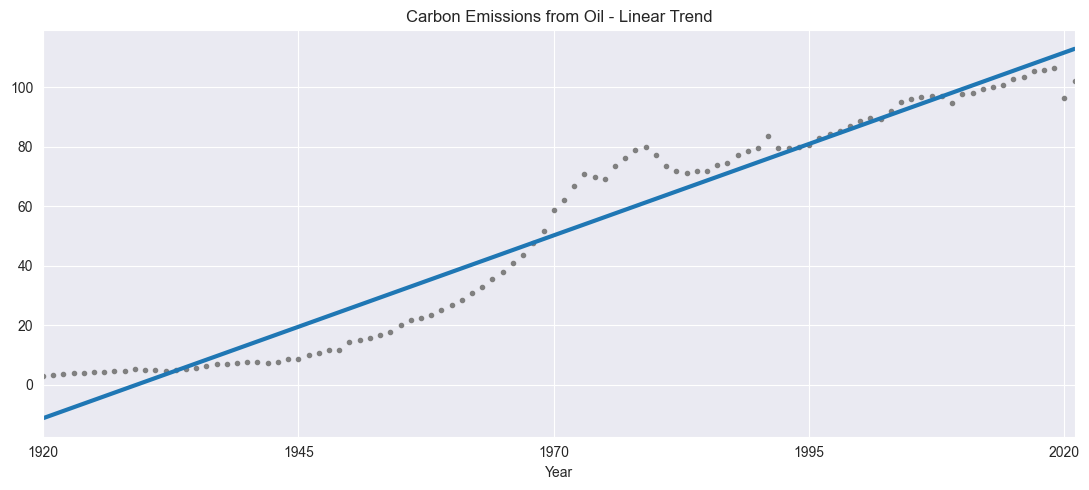

In [423]:
ax = avg_oil_small_df['Oil'].plot(style=".", color="0.5", title="Carbon Emissions from Oil - Linear Trend")
_ = y1_pred.plot(ax=ax, linewidth=3, label="Trend")

Forecast Trend

In [424]:
X1.tail()

,const,trend
Year,,
2017,1.0,98.0
2018,1.0,99.0
2019,1.0,100.0
2020,1.0,101.0
2021,1.0,102.0


In [425]:
X2 = dp.out_of_sample(steps=10) #10-year forecast 
X2.head()

,const,trend
2022,1.0,103.0
2023,1.0,104.0
2024,1.0,105.0
2025,1.0,106.0
2026,1.0,107.0


In [426]:
y2_fore = pd.Series(model.predict(X2), index=X2.index)
y2_fore.head()

2022    114.247500
2023    115.478372
2024    116.709245
2025    117.940118
2026    119.170991
Freq: A-DEC, dtype: float64

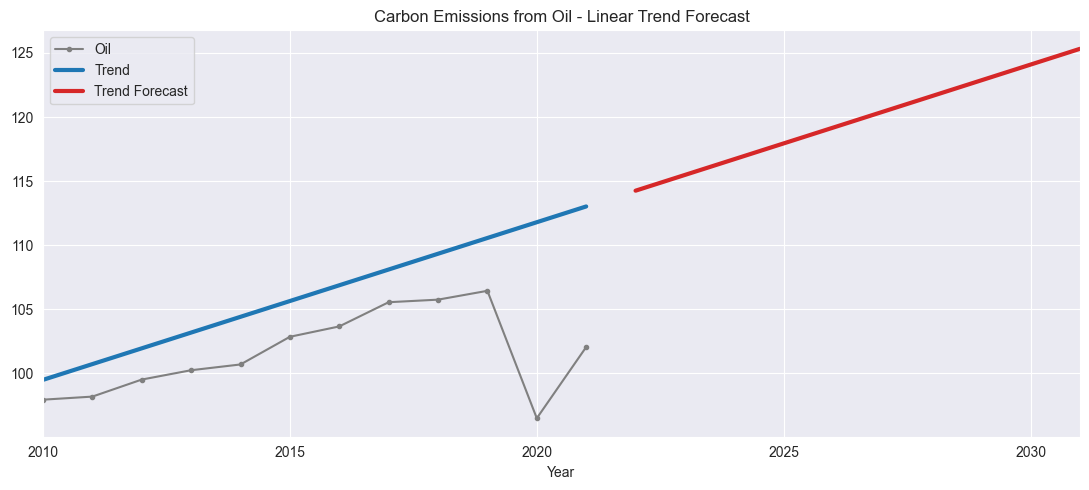

In [427]:
#let's plot a portion of the series to see the trend forecast for the next 10 years
ax = avg_oil_small_df['Oil']["2010-01-01":].plot(title="Carbon Emissions from Oil - Linear Trend Forecast", **plot_params)
ax = y1_pred["2010-01-01":].plot(ax=ax, linewidth=3, label="Trend")
ax = y2_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()